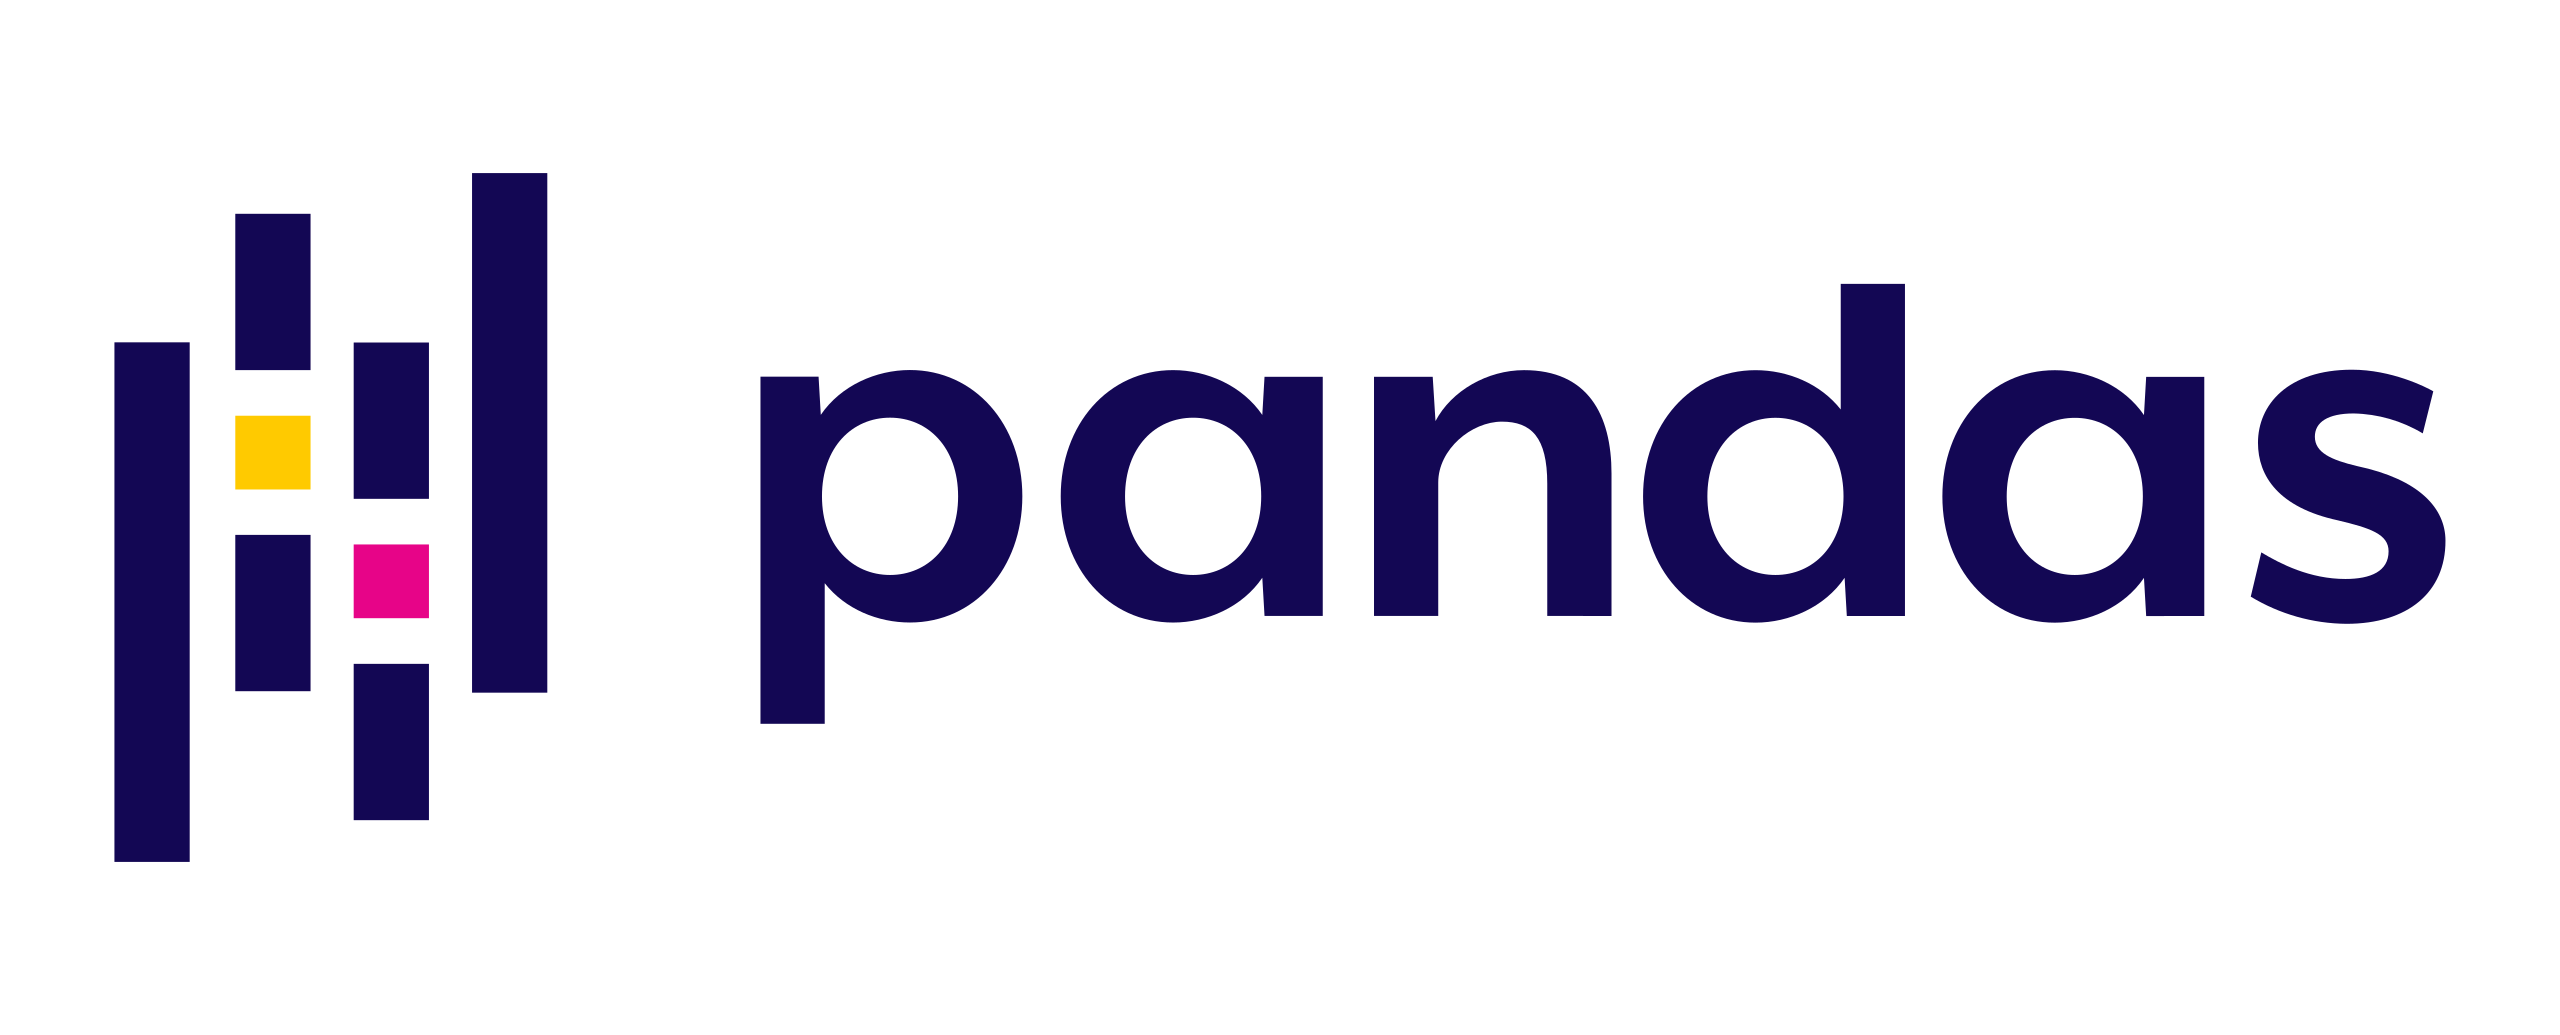

# ANALIZANDO DATOS DE EMISIONES DE GASES DE EFECTO INVERNADERO

### LEYENDO LA BASE DE DATOS

In [425]:
import pandas as pd
import numpy as np


In [426]:
df = pd.read_excel('1-SEEG10_GERAL-BR_UF_2022.10.27-FINAL-SITE.xlsx', sheet_name='GEE Estados')
df

c:\Users\Daniel\AppData\Local\Programs\Python\Python312\Lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,Nível 1 - Setor,Nível 2,Nível 3,Nível 4,Nível 5,Nível 6,Emissão / Remoção / Bunker,Gás,Estado,Atividade Econômica,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Processos Industriais,Indústria Química,Produção de ABS,NaN,NaN,NaN,Emissão,COVNM (t),SP,OUTRA_IND,...,897.600,897.600,897.600,897.600,897.600,897.600,897.600,897.600,8.976000e+02,897.600
1,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,Emissão,N2O (t),SP,OUTRA_IND,...,130.000,130.000,130.000,130.000,130.000,130.000,130.000,130.000,1.300000e+02,130.000
2,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,Emissão,CO (t),SP,OUTRA_IND,...,1380.576,1380.576,1380.576,1380.576,1380.576,1380.576,1380.576,1380.576,1.380576e+03,1380.576
3,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,Emissão,NOx (t),SP,OUTRA_IND,...,431.430,431.430,431.430,431.430,431.430,431.430,431.430,431.430,4.314300e+02,431.430
4,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,Emissão,CO2e (t) GWP-AR2,SP,OUTRA_IND,...,40300.000,40300.000,40300.000,40300.000,40300.000,40300.000,40300.000,40300.000,4.030000e+04,40300.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103307,Mudança de Uso da Terra e Floresta,Queimadas Não Associadas a Desmatamento,Pantanal,NaN,NaN,NaN,Emissão NCI,CO2e (t) GTP-AR6,BR,NaN,...,2731963.400,1091033.900,853275.300,1003731.400,1615000.600,1552258.800,216231.900,2805297.300,9.659261e+06,0.000
103308,Mudança de Uso da Terra e Floresta,Queimadas Não Associadas a Desmatamento,Pantanal,NaN,NaN,NaN,Emissão NCI,CO2e (t) GWP-AR2,BR,NaN,...,2921341.000,1144504.000,896685.000,1074717.000,1763431.000,1706030.000,252599.000,3105007.000,1.053571e+07,0.000
103309,Mudança de Uso da Terra e Floresta,Queimadas Não Associadas a Desmatamento,Pantanal,NaN,NaN,NaN,Emissão NCI,CO2e (t) GWP-AR4,BR,NaN,...,2950049.000,1151848.000,902209.000,1084073.000,1782863.000,1726958.000,257507.000,3147567.000,1.067568e+07,0.000
103310,Mudança de Uso da Terra e Floresta,Queimadas Não Associadas a Desmatamento,Pantanal,NaN,NaN,NaN,Emissão NCI,CO2e (t) GWP-AR5,BR,NaN,...,2957780.000,1152868.000,902368.000,1084826.000,1784237.000,1729598.000,258068.000,3155415.000,1.072232e+07,0.000


In [427]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103312 entries, 0 to 103311
Data columns (total 63 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Nível 1 - Setor             103312 non-null  object 
 1   Nível 2                     103312 non-null  object 
 2   Nível 3                     103253 non-null  object 
 3   Nível 4                     90920 non-null   object 
 4   Nível 5                     100788 non-null  object 
 5   Nível 6                     97691 non-null   object 
 6   Emissão / Remoção / Bunker  103312 non-null  object 
 7   Gás                         103312 non-null  object 
 8   Estado                      97374 non-null   object 
 9   Atividade Econômica         102076 non-null  object 
 10  Produto                     37413 non-null   object 
 11  1970                        103312 non-null  float64
 12  1971                        103312 non-null  float64
 13  1972          

## AJUSTANDO LA BASE DE DATOS

SOLO NOS INTERESA LAS EMISIONES DE GASES GENERADOS POR LOS ESTADOS QUE ESTAN EN EL INVENTARIO NACIONAL, POR LO QUE IDENTIFICAREMOS LOS TIPOS DE DATOS UNICOS EN LA COLUMNA ```Emissão / Remoção / Bunker```

In [428]:
df['Emissão / Remoção / Bunker'].unique()

array(['Emissão', 'Emissão NCI', 'Remoção NCI', 'Bunker', 'Remoção'],
      dtype=object)

Primerom vamos a revisar los datos de Remoção (eliminacion) para identificar si todos ellos son de retirada de gases de efecto invernadero.

In [429]:
(df['Emissão / Remoção / Bunker'] == 'Remoção NCI') | (df['Emissão / Remoção / Bunker'] == 'Remoção')

0         False
1         False
2         False
3         False
4         False
          ...  
103307    False
103308    False
103309    False
103310    False
103311    False
Name: Emissão / Remoção / Bunker, Length: 103312, dtype: bool

### FILTRAR LOS DATOS - 'Remoção NCI', 'Remoção'

Puedes utilizar el método ```isin()``` para filtrar más de un valor de la misma columna. Esta operación equivale a utilizar la operación lógica OR para todos los elementos de la lista.

Es posible utilizar el signo ```~``` para negar una operación lógica. De esta manera estamos seleccionando todos los datos distintos de 'Emissão'.

In [430]:
df[df['Emissão / Remoção / Bunker'].isin(['Remoção NCI', 'Remoção'])]
df.head()

,Nível 1 - Setor,Nível 2,Nível 3,Nível 4,Nível 5,Nível 6,Emissão / Remoção / Bunker,Gás,Estado,Atividade Econômica,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Processos Industriais,Indústria Química,Produção de ABS,NaN,NaN,NaN,Emissão,COVNM (t),SP,OUTRA_IND,...,897.600,897.600,897.600,897.600,897.600,897.600,897.600,897.600,897.600,897.600
1,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,Emissão,N2O (t),SP,OUTRA_IND,...,130.000,130.000,130.000,130.000,130.000,130.000,130.000,130.000,130.000,130.000
2,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,Emissão,CO (t),SP,OUTRA_IND,...,1380.576,1380.576,1380.576,1380.576,1380.576,1380.576,1380.576,1380.576,1380.576,1380.576
3,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,Emissão,NOx (t),SP,OUTRA_IND,...,431.430,431.430,431.430,431.430,431.430,431.430,431.430,431.430,431.430,431.430
4,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,Emissão,CO2e (t) GWP-AR2,SP,OUTRA_IND,...,40300.000,40300.000,40300.000,40300.000,40300.000,40300.000,40300.000,40300.000,40300.000,40300.000


### BUSCAR TODOS LOS REGISTROS EN FILAS Y COLUMNAS CON ```LOC``` DE LOS AÑOS 1970 AL 2021

In [431]:
df.loc[df['Emissão / Remoção / Bunker'].isin(['Remoção NCI', 'Remoção']), 1970:2021]

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
23520,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.434540e+07,-1.499358e+07,-1.543196e+07,-1.567070e+07,-1.630063e+07,-1.702215e+07,-1.740074e+07,-1.771914e+07,-1.767632e+07,-1.838895e+07
23521,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-5.382949e+06,-5.524659e+06,-5.632429e+06,-5.765030e+06,-5.867354e+06,-5.942076e+06,-6.022000e+06,-6.002147e+06,-6.035591e+06,-6.459079e+06
23522,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-3.450455e+06,-3.540294e+06,-3.545724e+06,-3.924546e+06,-4.626541e+06,-4.874199e+06,-4.849173e+06,-4.959540e+06,-5.106806e+06,-5.809814e+06
23523,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.260166e+06,-1.261895e+06,-1.371664e+06,-1.501452e+06,-1.507705e+06,-1.509919e+06,-1.609826e+06,-1.616980e+06,-1.518397e+06,-1.926000e+06
23524,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-3.429279e+07,-3.317185e+07,-3.281628e+07,-3.350720e+07,-3.557183e+07,-3.755308e+07,-4.134614e+07,-4.229403e+07,-4.275448e+07,-4.443440e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102751,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-7.513000e+04,-7.911900e+04,-8.695900e+04,-9.201400e+04,-9.149400e+04,-9.630200e+04,-9.202000e+04,-9.762300e+04,-1.015020e+05,-1.008910e+05
102752,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-9.523000e+03,-9.667000e+03,-1.000300e+04,-1.024200e+04,-1.027200e+04,-1.019100e+04,-1.046900e+04,-1.090400e+04,-1.104100e+04,-1.109500e+04
102753,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-7.513000e+04,-7.911900e+04,-8.695900e+04,-9.201400e+04,-9.149400e+04,-9.630200e+04,-9.202000e+04,-9.762300e+04,-1.015020e+05,-1.008910e+05
102754,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-9.523000e+03,-9.667000e+03,-1.000300e+04,-1.024200e+04,-1.027200e+04,-1.019100e+04,-1.046900e+04,-1.090400e+04,-1.104100e+04,-1.109500e+04


Para identificar si todos los varloes son negativos, vamos a utilizar la funcion ```max()``` para verificar si exite algun valor mayor que 0

In [432]:
df.loc[df['Emissão / Remoção / Bunker'].isin(['Remoção NCI', 'Remoção']), 1970:2021].max()

1970    0.0
1971    0.0
1972    0.0
1973    0.0
1974    0.0
1975    0.0
1976    0.0
1977    0.0
1978    0.0
1979    0.0
1980    0.0
1981    0.0
1982    0.0
1983    0.0
1984    0.0
1985    0.0
1986    0.0
1987    0.0
1988    0.0
1989    0.0
1990    0.0
1991    0.0
1992    0.0
1993    0.0
1994    0.0
1995    0.0
1996    0.0
1997    0.0
1998    0.0
1999    0.0
2000    0.0
2001    0.0
2002    0.0
2003    0.0
2004    0.0
2005    0.0
2006    0.0
2007    0.0
2008    0.0
2009    0.0
2010    0.0
2011    0.0
2012    0.0
2013    0.0
2014    0.0
2015    0.0
2016    0.0
2017    0.0
2018    0.0
2019    0.0
2020    0.0
2021    0.0
dtype: float64

Vamos tambien a identificar si algun valor de tipo Bunker corresponde a alguna emision hecha por algun estado

In [433]:
df.loc[df['Emissão / Remoção / Bunker'] == 'Bunker', 'Estado'].unique()

array([nan], dtype=object)

In [434]:
df = df[df['Emissão / Remoção / Bunker'] == 'Emissão'] 
df.head()

,Nível 1 - Setor,Nível 2,Nível 3,Nível 4,Nível 5,Nível 6,Emissão / Remoção / Bunker,Gás,Estado,Atividade Econômica,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Processos Industriais,Indústria Química,Produção de ABS,NaN,NaN,NaN,Emissão,COVNM (t),SP,OUTRA_IND,...,897.600,897.600,897.600,897.600,897.600,897.600,897.600,897.600,897.600,897.600
1,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,Emissão,N2O (t),SP,OUTRA_IND,...,130.000,130.000,130.000,130.000,130.000,130.000,130.000,130.000,130.000,130.000
2,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,Emissão,CO (t),SP,OUTRA_IND,...,1380.576,1380.576,1380.576,1380.576,1380.576,1380.576,1380.576,1380.576,1380.576,1380.576
3,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,Emissão,NOx (t),SP,OUTRA_IND,...,431.430,431.430,431.430,431.430,431.430,431.430,431.430,431.430,431.430,431.430
4,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,Emissão,CO2e (t) GWP-AR2,SP,OUTRA_IND,...,40300.000,40300.000,40300.000,40300.000,40300.000,40300.000,40300.000,40300.000,40300.000,40300.000


Como no sobro ningun valor util para analizar en la columna ```Emissão / Remoção / Bunker```, vamos a retirarla por completo de la base de datos

In [435]:
df = df.drop(columns='Emissão / Remoção / Bunker')
df.head()

,Nível 1 - Setor,Nível 2,Nível 3,Nível 4,Nível 5,Nível 6,Gás,Estado,Atividade Econômica,Produto,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Processos Industriais,Indústria Química,Produção de ABS,NaN,NaN,NaN,COVNM (t),SP,OUTRA_IND,NaN,...,897.600,897.600,897.600,897.600,897.600,897.600,897.600,897.600,897.600,897.600
1,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,N2O (t),SP,OUTRA_IND,NaN,...,130.000,130.000,130.000,130.000,130.000,130.000,130.000,130.000,130.000,130.000
2,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,CO (t),SP,OUTRA_IND,NaN,...,1380.576,1380.576,1380.576,1380.576,1380.576,1380.576,1380.576,1380.576,1380.576,1380.576
3,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,NOx (t),SP,OUTRA_IND,NaN,...,431.430,431.430,431.430,431.430,431.430,431.430,431.430,431.430,431.430,431.430
4,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,CO2e (t) GWP-AR2,SP,OUTRA_IND,NaN,...,40300.000,40300.000,40300.000,40300.000,40300.000,40300.000,40300.000,40300.000,40300.000,40300.000


# DESAFIOS

1. Encuentre los valores únicos de las columnas "Nível 1 - Setor" y "Estado" para identificar las actividades económicas presentes en la base de datos y si todos los estados brasileños están presentes en el DataFrame.

In [436]:
df['Nível 1 - Setor'].unique()

array(['Processos Industriais', 'Agropecuária', 'Energia', 'Resíduos ',
       'Mudança de Uso da Terra e Floresta'], dtype=object)

In [437]:
df['Estado'].unique()

array(['SP', 'BA', 'RJ', 'MG', 'SE', 'PR', nan, 'RO', 'AM', 'PA', 'TO',
       'MA', 'PI', 'CE', 'RN', 'PB', 'PE', 'AL', 'MT', 'MS', 'GO', 'DF',
       'ES', 'SC', 'RS', 'AC', 'AP', 'RR'], dtype=object)

2. Filtrar el DataFrame sólo con datos de estados de la región sur de Brasil.

In [438]:
df.loc[df['Estado'].isin(['PR', 'SC', 'RS'])]

,Nível 1 - Setor,Nível 2,Nível 3,Nível 4,Nível 5,Nível 6,Gás,Estado,Atividade Econômica,Produto,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
35,Processos Industriais,Indústria Química,Produção de Amônia,NaN,NaN,NaN,CO2 (t),PR,OUTRA_IND,NaN,...,4.562042e+05,4.682616e+05,5.151689e+05,5.151689e+05,5.151689e+05,5.151689e+05,5.151689e+05,5.151689e+05,5.151689e+05,5.151689e+05
36,Processos Industriais,Indústria Química,Produção de Amônia,NaN,NaN,NaN,CO2e (t) GWP-AR2,PR,OUTRA_IND,NaN,...,4.562042e+05,4.682616e+05,5.151689e+05,5.151689e+05,5.151689e+05,5.151689e+05,5.151689e+05,5.151689e+05,5.151689e+05,5.151689e+05
37,Processos Industriais,Indústria Química,Produção de Amônia,NaN,NaN,NaN,CO2e (t) GTP-AR2,PR,OUTRA_IND,NaN,...,4.562042e+05,4.682616e+05,5.151689e+05,5.151689e+05,5.151689e+05,5.151689e+05,5.151689e+05,5.151689e+05,5.151689e+05,5.151689e+05
110,Processos Industriais,Produtos Minerais,Produção de Cimento,NaN,NaN,NaN,CO2 (t),PR,CIM,NaN,...,2.012596e+06,2.212002e+06,2.241143e+06,2.176752e+06,2.279061e+06,2.115372e+06,2.173266e+06,2.230656e+06,2.488650e+06,2.845457e+06
111,Processos Industriais,Produtos Minerais,Produção de Cimento,NaN,NaN,NaN,CO2 (t),SC,CIM,NaN,...,7.126368e+05,6.421719e+05,8.163383e+05,6.769844e+05,5.272686e+05,5.143665e+05,5.130451e+05,5.451073e+05,6.144431e+05,7.179804e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103221,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pampa,NaN,Desmatamento,NaN,CO2e (t) GWP-AR2,RS,AGROPEC,NaN,...,1.108518e+06,1.479183e+06,9.718840e+05,9.948190e+05,7.698680e+05,9.057280e+05,9.238730e+05,1.046432e+06,1.439095e+06,1.432812e+06
103222,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pampa,NaN,Desmatamento,NaN,CO2e (t) GWP-AR4,RS,AGROPEC,NaN,...,1.196999e+06,1.599471e+06,1.045298e+06,1.070678e+06,8.308050e+05,9.748940e+05,9.924510e+05,1.124747e+06,1.543126e+06,1.541087e+06
103223,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pampa,NaN,Desmatamento,NaN,CO2e (t) GWP-AR5,RS,AGROPEC,NaN,...,1.221927e+06,1.635136e+06,1.062603e+06,1.089187e+06,8.475340e+05,9.918540e+05,1.007627e+06,1.142614e+06,1.563684e+06,1.566694e+06
103224,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pampa,NaN,Desmatamento,NaN,CO2e (t) GWP-AR6,RS,AGROPEC,NaN,...,1.232994e+06,1.649637e+06,1.072887e+06,1.099601e+06,8.553060e+05,1.001321e+06,1.017557e+06,1.153771e+06,1.579514e+06,1.581831e+06


3. Filtrar el DataFrame sólo con datos de "Mudança de Uso da Terra e Floresta" que sean del Estado de Amazonas.

In [439]:
df[(df['Nível 1 - Setor'] == 'Mudança de Uso da Terra e Floresta') & (df['Estado'] == 'AM')]


,Nível 1 - Setor,Nível 2,Nível 3,Nível 4,Nível 5,Nível 6,Gás,Estado,Atividade Econômica,Produto,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
81262,Mudança de Uso da Terra e Floresta,Alterações de Uso da Terra,Amazônia,fora de Área Protegida,Desmatamento,Floresta primária -- Área sem vegetação,CO2 (t),AM,AGROPEC,NaN,...,8.511800e+04,9.763700e+04,8.761900e+04,1.218150e+05,1.137590e+05,5.299800e+04,6.117000e+04,48264.0,14381.0,31867.0
81271,Mudança de Uso da Terra e Floresta,Alterações de Uso da Terra,Amazônia,fora de Área Protegida,Desmatamento,Floresta primária -- Área sem vegetação,CO2e (t) GTP-AR2,AM,AGROPEC,NaN,...,8.511800e+04,9.763700e+04,8.761900e+04,1.218150e+05,1.137590e+05,5.299800e+04,6.117000e+04,48264.0,14381.0,31867.0
81280,Mudança de Uso da Terra e Floresta,Alterações de Uso da Terra,Amazônia,fora de Área Protegida,Desmatamento,Floresta primária -- Área sem vegetação,CO2e (t) GTP-AR4,AM,AGROPEC,NaN,...,8.511800e+04,9.763700e+04,8.761900e+04,1.218150e+05,1.137590e+05,5.299800e+04,6.117000e+04,48264.0,14381.0,31867.0
81289,Mudança de Uso da Terra e Floresta,Alterações de Uso da Terra,Amazônia,fora de Área Protegida,Desmatamento,Floresta primária -- Área sem vegetação,CO2e (t) GTP-AR5,AM,AGROPEC,NaN,...,8.511800e+04,9.763700e+04,8.761900e+04,1.218150e+05,1.137590e+05,5.299800e+04,6.117000e+04,48264.0,14381.0,31867.0
81298,Mudança de Uso da Terra e Floresta,Alterações de Uso da Terra,Amazônia,fora de Área Protegida,Desmatamento,Floresta primária -- Área sem vegetação,CO2e (t) GTP-AR6,AM,AGROPEC,NaN,...,8.511800e+04,9.763700e+04,8.761900e+04,1.218150e+05,1.137590e+05,5.299800e+04,6.117000e+04,48264.0,14381.0,31867.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102803,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Amazônia,NaN,Desmatamento,NaN,CO2e (t) GWP-AR2,AM,AGROPEC,NaN,...,2.239997e+06,3.186571e+06,2.973253e+06,4.796274e+06,7.396711e+06,4.362453e+06,4.434835e+06,7074966.0,8746520.0,8429758.0
102812,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Amazônia,NaN,Desmatamento,NaN,CO2e (t) GWP-AR4,AM,AGROPEC,NaN,...,2.505953e+06,3.565317e+06,3.330733e+06,5.368844e+06,8.276064e+06,4.888099e+06,4.967871e+06,7929733.0,9799770.0,9408067.0
102821,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Amazônia,NaN,Desmatamento,NaN,CO2e (t) GWP-AR5,AM,AGROPEC,NaN,...,2.651128e+06,3.772286e+06,3.528292e+06,5.683071e+06,8.756712e+06,5.179207e+06,5.262358e+06,8404321.0,10382705.0,9929881.0
102830,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Amazônia,NaN,Desmatamento,NaN,CO2e (t) GWP-AR6,AM,AGROPEC,NaN,...,2.661898e+06,3.787545e+06,3.541992e+06,5.705721e+06,8.792123e+06,5.199159e+06,5.282817e+06,8436366.0,10422789.0,9973416.0


4. Encuentre el valor máximo de emisión para el año 2021 para los datos de "Agropecuária" en el Estado de Pará.

In [440]:
df.loc[(df['Nível 1 - Setor'] == 'Agropecuária') & (df['Estado'] == 'PA'), 2021].max()


np.float64(36856969.7986)

1. Agrupe los datos según la columna "Nível 1 - Setor" para ver el diccionario que contiene las llaves de los grupos formados y la lista de índices para cada grupo.

In [441]:
df.groupby(['Nível 1 - Setor']).groups

{'Agropecuária': [1137, 1138, 1139, 1140, 1141, 1142, 1143, 1144, 1145, 1146, 1147, 1148, 1149, 1150, 1151, 1152, 1153, 1154, 1155, 1156, 1157, 1158, 1159, 1160, 1161, 1162, 1163, 1164, 1165, 1166, 1167, 1168, 1169, 1170, 1171, 1172, 1173, 1174, 1175, 1176, 1177, 1178, 1179, 1180, 1181, 1182, 1183, 1184, 1185, 1186, 1187, 1188, 1189, 1190, 1191, 1192, 1193, 1194, 1195, 1196, 1197, 1198, 1199, 1200, 1201, 1202, 1203, 1204, 1205, 1206, 1207, 1208, 1209, 1210, 1211, 1212, 1213, 1214, 1215, 1216, 1217, 1218, 1219, 1220, 1221, 1222, 1223, 1224, 1225, 1226, 1227, 1228, 1229, 1230, 1231, 1232, 1233, 1234, 1235, 1236, ...], 'Energia': [24735, 24736, 24737, 24738, 24739, 24740, 24741, 24742, 24743, 24744, 24745, 24746, 24747, 24748, 24749, 24750, 24751, 24752, 24753, 24754, 24755, 24756, 24757, 24758, 24759, 24760, 24761, 24762, 24763, 24764, 24765, 24766, 24767, 24768, 24769, 24770, 24771, 24772, 24773, 24774, 24775, 24776, 24777, 24778, 24779, 24780, 24781, 24782, 24783, 24784, 24785, 24786, 

2. Agrupe los datos según la columna "Nível 1 - Setor" y ubique los datos del grupo "Agropecuária".

In [442]:
df.groupby('Nível 1 - Setor').get_group('Agropecuária')
df.sample(5)

,Nível 1 - Setor,Nível 2,Nível 3,Nível 4,Nível 5,Nível 6,Gás,Estado,Atividade Econômica,Produto,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
51482,Energia,Emissões pela Queima de Combustíveis,Industrial,Outras indústrias,GLP,Consumo Final Energético,N2O (t),GO,OUTRA_IND,NaN,...,0.313036,0.399374,0.314543,0.205872,0.165301,0.165809,0.174710,0.188819,0.228325,0.285136
33740,Energia,Emissões pela Queima de Combustíveis,Industrial,Alimentos e bebidas,Gás natural seco,Centrais Elétricas Autoprodutoras,N2O (t),RN,ENE_ELET,ENE_ELET,...,0.122005,0.129120,0.162892,0.157686,0.159035,0.151921,0.143468,0.146304,0.157384,0.148219
78162,Resíduos,Efluentes Liquidos,Efluentes Líquidos Industriais,Produção de Celulose,NaN,NaN,CO2e (t) GWP-AR4,MA,OUTRA_IND,NaN,...,0.000000,0.000000,55694.712566,53390.942139,53514.995728,55664.375517,60105.666911,56131.879874,59729.382916,64153.570492
90157,Mudança de Uso da Terra e Floresta,Alterações de Uso da Terra,Cerrado,em Área Protegida,Regeneração,Uso agropecuário -- Vegetação não florestal se...,CO2e (t) GWP-AR5,MT,AGROPEC,NaN,...,68964.000000,34354.000000,14963.000000,14705.000000,19457.000000,36360.000000,51913.000000,34494.000000,6780.000000,25493.000000
43620,Energia,Emissões pela Queima de Combustíveis,Industrial,Ferro gusa e aço,Óleo combustível,Consumo Final Energético,CO2 (t),PA,MET,ACO,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


3. Agrupe los datos con base en la columna “Nível 1 - Setor” para identificar la emisión promedio de cada actividad económica en 2021

In [443]:
df.loc[:,'Nível 1 - Setor': 'Atividade Econômica'].columns

Index(['Nível 1 - Setor', 'Nível 2', 'Nível 3', 'Nível 4', 'Nível 5',
       'Nível 6', 'Gás', 'Estado', 'Atividade Econômica'],
      dtype='object')

In [444]:
df_lista = list(df.loc[:,'Nível 1 - Setor': 'Atividade Econômica'].columns)
df.head()

,Nível 1 - Setor,Nível 2,Nível 3,Nível 4,Nível 5,Nível 6,Gás,Estado,Atividade Econômica,Produto,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Processos Industriais,Indústria Química,Produção de ABS,NaN,NaN,NaN,COVNM (t),SP,OUTRA_IND,NaN,...,897.600,897.600,897.600,897.600,897.600,897.600,897.600,897.600,897.600,897.600
1,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,N2O (t),SP,OUTRA_IND,NaN,...,130.000,130.000,130.000,130.000,130.000,130.000,130.000,130.000,130.000,130.000
2,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,CO (t),SP,OUTRA_IND,NaN,...,1380.576,1380.576,1380.576,1380.576,1380.576,1380.576,1380.576,1380.576,1380.576,1380.576
3,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,NOx (t),SP,OUTRA_IND,NaN,...,431.430,431.430,431.430,431.430,431.430,431.430,431.430,431.430,431.430,431.430
4,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,CO2e (t) GWP-AR2,SP,OUTRA_IND,NaN,...,40300.000,40300.000,40300.000,40300.000,40300.000,40300.000,40300.000,40300.000,40300.000,40300.000


In [445]:
df.loc[:, 1970:2021].columns

Index([1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981,
       1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993,
       1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005,
       2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
       2018, 2019, 2020, 2021],
      dtype='object')

In [446]:
df_emision_2021 = list(df.loc[:, 1970:2021].columns)


In [447]:
emisiones_desafio = df.melt(id_vars=df_lista, value_vars=df_emision_2021, var_name='Año', value_name='Emision')
emisiones_desafio

,Nível 1 - Setor,Nível 2,Nível 3,Nível 4,Nível 5,Nível 6,Gás,Estado,Atividade Econômica,Año,Emision
0,Processos Industriais,Indústria Química,Produção de ABS,NaN,NaN,NaN,COVNM (t),SP,OUTRA_IND,1970,0.0
1,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,N2O (t),SP,OUTRA_IND,1970,6210.0
2,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,CO (t),SP,OUTRA_IND,1970,368.0
3,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,NOx (t),SP,OUTRA_IND,1970,115.0
4,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,CO2e (t) GWP-AR2,SP,OUTRA_IND,1970,1925100.0
...,...,...,...,...,...,...,...,...,...,...,...
4926891,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pantanal,NaN,Desmatamento,NaN,CO2e (t) GWP-AR5,MS,AGROPEC,2021,1004191.0
4926892,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pantanal,NaN,Desmatamento,NaN,CO2e (t) GWP-AR6,MT,AGROPEC,2021,443120.0
4926893,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pantanal,NaN,Desmatamento,NaN,CO2e (t) GWP-AR6,MS,AGROPEC,2021,1009968.0
4926894,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pantanal,NaN,Desmatamento,NaN,N2O (t),MT,AGROPEC,2021,479.0


In [448]:
emisiones_desafio[emisiones_desafio['Año']==2021].groupby('Nível 1 - Setor')[['Emision']].mean()


,Emision
Nível 1 - Setor,
Agropecuária,149793.768835
Energia,72928.637234
Mudança de Uso da Terra e Floresta,690085.511209
Processos Industriais,787101.255789
Resíduos,106106.723386


4. Agrupe los datos con base en la columna "Nível 1 - Setor" para identificar la suma de emisiones de cada actividad económica. Ordene los datos de mayor a menor emisión.

In [449]:
emisiones_desafio[emisiones_desafio['Año']==2021].groupby('Nível 1 - Setor')[['Emision']].sum().sort_values('Emision', ascending=False)

,Emision
Nível 1 - Setor,
Mudança de Uso da Terra e Floresta,1.034300e+10
Energia,3.840933e+09
Agropecuária,3.316434e+09
Processos Industriais,8.949341e+08
Resíduos,4.049033e+08


In [450]:
suma_emisiones = emisiones_desafio.groupby('Nível 1 - Setor')[['Emision']].sum().sort_values('Emision', ascending=False)
suma_emisiones


,Emision
Nível 1 - Setor,
Mudança de Uso da Terra e Floresta,3.524898e+11
Energia,1.205314e+11
Agropecuária,1.147284e+11
Processos Industriais,2.849965e+10
Resíduos,1.034465e+10


El equipo de supervisión ahora quiere saber la emisión promedio de cada uno de los sectores económicos en la columna "Nivel 1 - Sector". Como desafío, crea una tabla dinámica y una visualización gráfica que contenga esta información, usando solo el método pivot_table para construir la tabla, sin usar el método groupby.

In [451]:
emision_sectores_promedio = emisiones_desafio.pivot_table(values='Emision', index='Año', columns='Nível 1 - Setor', aggfunc='mean')
emision_sectores_promedio

Nível 1 - Setor,Agropecuária,Energia,Mudança de Uso da Terra e Floresta,Processos Industriais,Resíduos
Año,,,,,
1970,49292.425313,15939.703116,0.000000e+00,106549.168676,11684.883558
1971,51199.559433,17698.989894,0.000000e+00,111532.507753,12676.706849
1972,53508.935498,19092.876761,0.000000e+00,125701.525455,13709.697850
1973,55494.006224,22062.085929,0.000000e+00,137657.110402,14715.248028
1974,57896.513900,23810.659474,0.000000e+00,149941.779638,15710.616150
1975,63303.098508,25036.433686,0.000000e+00,168471.860169,16667.446706
1976,66347.533521,27214.281091,0.000000e+00,193826.482068,17539.505222
1977,66977.413505,27645.258640,0.000000e+00,231505.609283,18462.455148
1978,66640.432009,29734.461056,0.000000e+00,255736.210711,19327.840165


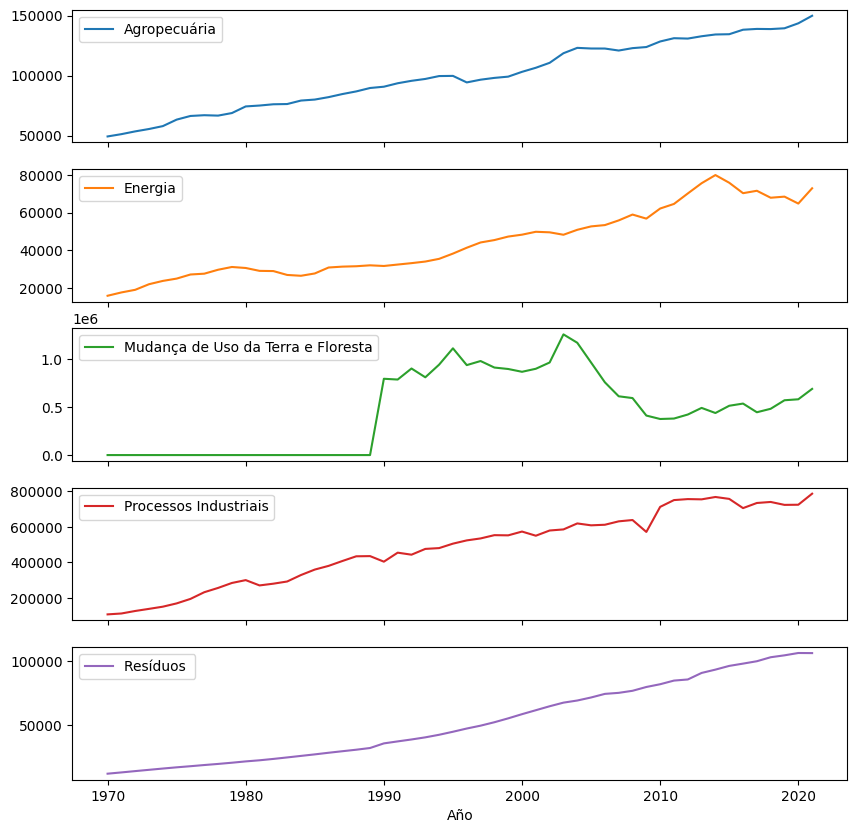

In [452]:
emision_sectores_promedio.plot(subplots=True, figsize=(10,10));

1. Agrupe los datos con las columnas "Estado" y "Nível 1 - Setor", obteniendo la suma de emisiones y almacenando el resultado en una tabla.

In [453]:
emisiones_estado_sector = emisiones_desafio.groupby(['Estado', 'Nível 1 - Setor'])[['Emision']].sum()
emisiones_estado_sector

Emision
Estado Nível 1 - Setor                                 
AC     Agropecuária                        7.270206e+08
       Energia                             2.071751e+08
       Mudança de Uso da Terra e Floresta  7.847879e+09
       Resíduos                            2.928323e+07
AL     Agropecuária                        7.628303e+08
...                                                 ...
TO     Agropecuária                        2.762475e+09
       Energia                             5.130379e+08
       Mudança de Uso da Terra e Floresta  9.435591e+09
       Processos Industriais               2.613905e+07
       Resíduos                            6.177003e+07

[132 rows x 1 columns]

2. Utilizando la tabla construida en la actividad 1, seleccione los datos referentes a "Energía" del índice "Nível 1 - Setor".

In [454]:
emisiones_estado_sector.xs('Energia', level=1)

,Emision
Estado,
AC,2.071751e+08
AL,5.958697e+08
AM,1.916462e+09
AP,2.638059e+08
BA,4.801368e+09
CE,1.879584e+09
DF,9.487860e+08
ES,2.201326e+09
GO,2.761709e+09


3. Utilizando la tabla construida en la actividad 1, encuentre la actividad económica con valor máximo de emisión en el Estado de Minas Gerais.

In [455]:
emisiones_estado_sector.xs('MG', level=0).idxmax()

Emision    Agropecuária
dtype: object

4. Obtenga una tabla que contenga la actividad económica con emisión máxima para cada Estado.

In [456]:
emisiones_estado_sector = emisiones_desafio.groupby(['Estado', 'Nível 1 - Setor'])[['Emision']].sum()
emisiones_estado_sector.groupby(level=0).idxmax()

,Emision
Estado,
AC,"(AC, Mudança de Uso da Terra e Floresta)"
AL,"(AL, Agropecuária)"
AM,"(AM, Mudança de Uso da Terra e Floresta)"
AP,"(AP, Mudança de Uso da Terra e Floresta)"
BA,"(BA, Mudança de Uso da Terra e Floresta)"
CE,"(CE, Energia)"
DF,"(DF, Energia)"
ES,"(ES, Processos Industriais)"
GO,"(GO, Agropecuária)"


5. Obtenga una tabla que contenga el Estado con emisión máxima para cada actividad económica.

In [457]:
emisiones_estado_sector = emisiones_desafio.groupby(['Estado', 'Nível 1 - Setor'])[['Emision']].sum()
emisiones_estado_sector.groupby(level=1).idxmax()

,Emision
Nível 1 - Setor,
Agropecuária,"(MG, Agropecuária)"
Energia,"(SP, Energia)"
Mudança de Uso da Terra e Floresta,"(PA, Mudança de Uso da Terra e Floresta)"
Processos Industriais,"(MG, Processos Industriais)"
Resíduos,"(SP, Resíduos )"


# 2. AGRUPAMINETO DE LOS DATOS

### Transformar a formato long

Para realizar las agrupaciones en los datos de emisiones, la base de datos debe estar en un formato adecuado con los valores de emisiones todos en la misma columna. Para ello debemos modificar el formato de la base de datos para que las columnas referentes a cada años se conviertan en una unica columna.

In [458]:
df.loc[:,'Nível 1 - Setor': 'Produto'].columns

Index(['Nível 1 - Setor', 'Nível 2', 'Nível 3', 'Nível 4', 'Nível 5',
       'Nível 6', 'Gás', 'Estado', 'Atividade Econômica', 'Produto'],
      dtype='object')

In [459]:
df_columnas = list(df.loc[:,'Nível 1 - Setor': 'Produto'].columns)
df_columnas

['Nível 1 - Setor',
 'Nível 2',
 'Nível 3',
 'Nível 4',
 'Nível 5',
 'Nível 6',
 'Gás',
 'Estado',
 'Atividade Econômica',
 'Produto']

In [460]:
df.loc[:, 1970:2021].columns

Index([1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981,
       1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993,
       1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005,
       2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
       2018, 2019, 2020, 2021],
      dtype='object')

In [461]:
df_columnas_emision = list(df.loc[:, 1970:2021].columns)


Para realizar la transformacion del DataFrame utilizamos el metodo ```melt()```. Este metodo tiene como objetivo transformar un DataFrame de un formato ancho (wide) para un formato largo (long).

El parámetro ```id_vars``` se utiliza para identificar los nombres de las columnas que se mantendrán en el momento de la transformación. El parámetro ```value_vars``` se utiliza para identificar las columnas que se transformarán en las columnas principales del formato long, una que contiene las categorías con los nombres de las columnas y la otra que contiene los valores. El parámetro ```var_name``` se utiliza para nombrar la columna que contiene las categorías y el parámetro ```value_name``` para nombrar la columna con los valores numéricos.

In [462]:
df.melt(id_vars=df_columnas, value_vars=df_columnas_emision, var_name='Año', value_name='Emision')

,Nível 1 - Setor,Nível 2,Nível 3,Nível 4,Nível 5,Nível 6,Gás,Estado,Atividade Econômica,Produto,Año,Emision
0,Processos Industriais,Indústria Química,Produção de ABS,NaN,NaN,NaN,COVNM (t),SP,OUTRA_IND,NaN,1970,0.0
1,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,N2O (t),SP,OUTRA_IND,NaN,1970,6210.0
2,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,CO (t),SP,OUTRA_IND,NaN,1970,368.0
3,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,NOx (t),SP,OUTRA_IND,NaN,1970,115.0
4,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,CO2e (t) GWP-AR2,SP,OUTRA_IND,NaN,1970,1925100.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4926891,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pantanal,NaN,Desmatamento,NaN,CO2e (t) GWP-AR5,MS,AGROPEC,NaN,2021,1004191.0
4926892,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pantanal,NaN,Desmatamento,NaN,CO2e (t) GWP-AR6,MT,AGROPEC,NaN,2021,443120.0
4926893,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pantanal,NaN,Desmatamento,NaN,CO2e (t) GWP-AR6,MS,AGROPEC,NaN,2021,1009968.0
4926894,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pantanal,NaN,Desmatamento,NaN,N2O (t),MT,AGROPEC,NaN,2021,479.0


In [463]:
df_emisiones_por_año = df.melt(id_vars=df_columnas, value_vars=df_columnas_emision, var_name='Año', value_name='Emision')

### ANALISIS DE LAS EMISIONES

Vamos a realizar un analisis pero esta vez, de la cantidad de la emision total por tipo de gas. Para esto vamos a realizar un agrupamiento de los datos con la funcion ```goupby()```

In [464]:
df_emisiones_por_año.groupby(['Gás'])['Emision'].sum()

Gás
C2F6 (t)            5.765018e+02
CF4 (t)             7.135481e+03
CH4 (t)             7.949268e+08
CO (t)              5.111531e+08
CO2 (t)             5.324636e+10
CO2e (t) GTP-AR2    6.344612e+10
CO2e (t) GTP-AR4    6.344612e+10
CO2e (t) GTP-AR5    6.182200e+10
CO2e (t) GTP-AR6    6.247859e+10
CO2e (t) GWP-AR2    7.720596e+10
CO2e (t) GWP-AR4    8.015921e+10
CO2e (t) GWP-AR5    8.181375e+10
CO2e (t) GWP-AR6    8.132316e+10
COVNM (t)           2.242130e+08
HFC-125 (t)         9.795580e+03
HFC-134a (t)        1.394731e+05
HFC-143a (t)        9.039400e+03
HFC-152a (t)        5.706000e+02
HFC-23 (t)          1.197840e+03
HFC-32 (t)          2.367750e+03
N2O (t)             2.240066e+07
NOx (t)             9.976123e+07
SF6 (t)             4.705800e+02
Name: Emision, dtype: float64

Podemos revisar cuales datos fueron agupados en cada grupo con el uso del atributo ```groups``` y realizar selecciones de grupos especificos con el metodo ```get_group()```

In [465]:
df_emisiones_por_año.groupby(['Gás']).groups

{'C2F6 (t)': [410, 411, 412, 425, 426, 427, 95158, 95159, 95160, 95173, 95174, 95175, 189906, 189907, 189908, 189921, 189922, 189923, 284654, 284655, 284656, 284669, 284670, 284671, 379402, 379403, 379404, 379417, 379418, 379419, 474150, 474151, 474152, 474165, 474166, 474167, 568898, 568899, 568900, 568913, 568914, 568915, 663646, 663647, 663648, 663661, 663662, 663663, 758394, 758395, 758396, 758409, 758410, 758411, 853142, 853143, 853144, 853157, 853158, 853159, 947890, 947891, 947892, 947905, 947906, 947907, 1042638, 1042639, 1042640, 1042653, 1042654, 1042655, 1137386, 1137387, 1137388, 1137401, 1137402, 1137403, 1232134, 1232135, 1232136, 1232149, 1232150, 1232151, 1326882, 1326883, 1326884, 1326897, 1326898, 1326899, 1421630, 1421631, 1421632, 1421645, 1421646, 1421647, 1516378, 1516379, 1516380, 1516393, ...], 'CF4 (t)': [407, 408, 409, 422, 423, 424, 95155, 95156, 95157, 95170, 95171, 95172, 189903, 189904, 189905, 189918, 189919, 189920, 284651, 284652, 284653, 284666, 284667

In [466]:
df_emisiones_por_año.groupby('Gás').get_group('CO2 (t)')

,Nível 1 - Setor,Nível 2,Nível 3,Nível 4,Nível 5,Nível 6,Gás,Estado,Atividade Econômica,Produto,Año,Emision
18,Processos Industriais,Indústria Química,Produção de Acrilonitrila,NaN,NaN,NaN,CO2 (t),BA,OUTRA_IND,NaN,1970,0.000000
23,Processos Industriais,Indústria Química,Produção de Amônia,NaN,NaN,NaN,CO2 (t),RJ,OUTRA_IND,NaN,1970,0.000000
26,Processos Industriais,Indústria Química,Produção de Amônia,NaN,NaN,NaN,CO2 (t),MG,OUTRA_IND,NaN,1970,0.000000
29,Processos Industriais,Indústria Química,Produção de Amônia,NaN,NaN,NaN,CO2 (t),BA,OUTRA_IND,NaN,1970,10742.465792
32,Processos Industriais,Indústria Química,Produção de Amônia,NaN,NaN,NaN,CO2 (t),SE,OUTRA_IND,NaN,1970,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
4926255,Mudança de Uso da Terra e Floresta,Alterações de Uso da Terra,Pantanal,em Área Protegida,Outras Mudanças de uso da terra,Uso agropecuário -- Uso agropecuário,CO2 (t),MS,AGROPEC,NaN,2021,0.000000
4926272,Mudança de Uso da Terra e Floresta,Alterações de Uso da Terra,Pantanal,em Área Protegida,Regeneração,Uso agropecuário -- Floresta secundária,CO2 (t),MT,AGROPEC,NaN,2021,374.000000
4926273,Mudança de Uso da Terra e Floresta,Alterações de Uso da Terra,Pantanal,em Área Protegida,Regeneração,Uso agropecuário -- Floresta secundária,CO2 (t),MS,AGROPEC,NaN,2021,8613.000000
4926290,Mudança de Uso da Terra e Floresta,Alterações de Uso da Terra,Pantanal,em Área Protegida,Regeneração,Uso agropecuário -- Vegetação não florestal se...,CO2 (t),MT,AGROPEC,NaN,2021,934.000000


In [467]:
df_emisiones_por_gas = df_emisiones_por_año.groupby(['Gás'])['Emision'].sum().sort_values(ascending=False)
df_emisiones_por_gas

Gás
CO2e (t) GWP-AR5    8.181375e+10
CO2e (t) GWP-AR6    8.132316e+10
CO2e (t) GWP-AR4    8.015921e+10
CO2e (t) GWP-AR2    7.720596e+10
CO2e (t) GTP-AR4    6.344612e+10
CO2e (t) GTP-AR2    6.344612e+10
CO2e (t) GTP-AR6    6.247859e+10
CO2e (t) GTP-AR5    6.182200e+10
CO2 (t)             5.324636e+10
CH4 (t)             7.949268e+08
CO (t)              5.111531e+08
COVNM (t)           2.242130e+08
NOx (t)             9.976123e+07
N2O (t)             2.240066e+07
HFC-134a (t)        1.394731e+05
HFC-125 (t)         9.795580e+03
HFC-143a (t)        9.039400e+03
CF4 (t)             7.135481e+03
HFC-32 (t)          2.367750e+03
HFC-23 (t)          1.197840e+03
C2F6 (t)            5.765018e+02
HFC-152a (t)        5.706000e+02
SF6 (t)             4.705800e+02
Name: Emision, dtype: float64

### Graficar

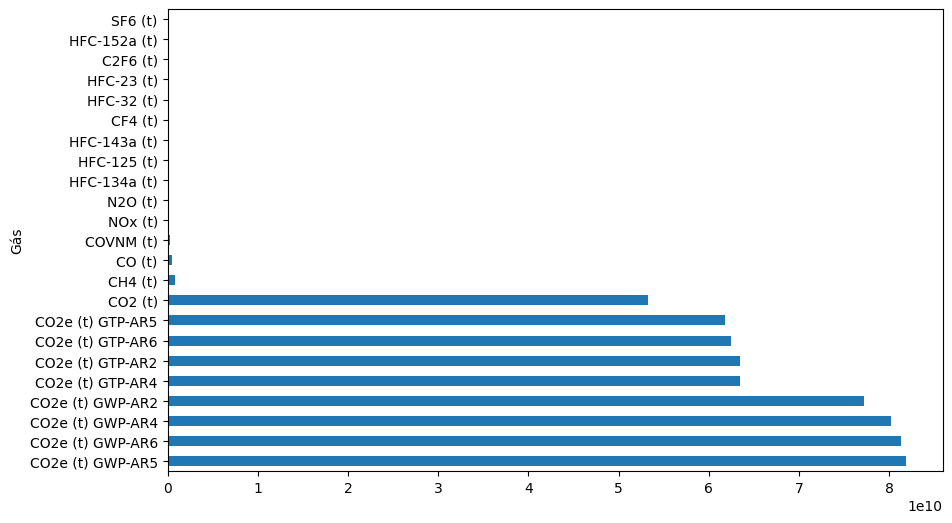

In [468]:
df_emisiones_por_gas.plot(kind='barh', figsize=(10,6));

### Gasese CO2 - son los que tienen mas emisiones
### Seleccionamos las filas que tienen CO2

In [469]:
df_emisiones_por_gas.iloc[0:9]

Gás
CO2e (t) GWP-AR5    8.181375e+10
CO2e (t) GWP-AR6    8.132316e+10
CO2e (t) GWP-AR4    8.015921e+10
CO2e (t) GWP-AR2    7.720596e+10
CO2e (t) GTP-AR4    6.344612e+10
CO2e (t) GTP-AR2    6.344612e+10
CO2e (t) GTP-AR6    6.247859e+10
CO2e (t) GTP-AR5    6.182200e+10
CO2 (t)             5.324636e+10
Name: Emision, dtype: float64

### Calcula el Porcentaje de las emisiones de Co2 comparado con las otras emisiones

In [470]:
emisiones_co2 = float(df_emisiones_por_gas.iloc[0:9].sum() / df_emisiones_por_gas.sum())*100
emisiones_co2

99.73625255007093

In [471]:
print(f'Las emisiones de CO2 corresponden a {emisiones_co2:.2f} % de las emisiones totlaes de gases de efecto invernadero en Brasil desde 1970 a 2021')

Las emisiones de CO2 corresponden a 99.74 % de las emisiones totlaes de gases de efecto invernadero en Brasil desde 1970 a 2021


# 3. AGRUPAMIENTO MULTI-INDEX

Ahora necesitamos encontrar dos informaciones:

    -Detectar cuales son los sectores mas contaminantes por cada gas.
    -Descubrir cuales son los gases mas contaminantes por cada sector.

In [472]:
gas_por_sector = df_emisiones_por_año.groupby(['Gás', 'Nível 1 - Setor']).sum(numeric_only=True)
gas_por_sector

Emision
Gás      Nível 1 - Setor                                 
C2F6 (t) Processos Industriais               5.765018e+02
CF4 (t)  Processos Industriais               7.135481e+03
CH4 (t)  Agropecuária                        5.928481e+08
         Energia                             3.429034e+07
         Mudança de Uso da Terra e Floresta  8.662166e+07
...                                                   ...
N2O (t)  Resíduos                            2.764127e+05
NOx (t)  Agropecuária                        2.602719e+06
         Energia                             9.361215e+07
         Processos Industriais               3.546360e+06
SF6 (t)  Processos Industriais               4.705800e+02

[72 rows x 1 columns]

Para decubrir el sector que emite mayor cantidad de CO2 podemos realiza una seleccion especifica de gas CO2 mediante el metodo ```cross-section xs()```, extrayendo de esto el valor maximo y el indice maximo con los metodos ```max() y idmax()```

In [473]:
gas_por_sector.xs('CO2 (t)', level=0)

,Emision
Nível 1 - Setor,
Agropecuária,5.411750e+08
Energia,1.261352e+10
Mudança de Uso da Terra e Floresta,3.733930e+10
Processos Industriais,2.729603e+09
Resíduos,2.276264e+07


In [474]:
gas_por_sector.xs(('CO2 (t)', 'Mudança de Uso da Terra e Floresta'), level=[0,1])

,,Emision
Gás,Nível 1 - Setor,
CO2 (t),Mudança de Uso da Terra e Floresta,3.733930e+10


In [475]:
gas_por_sector.xs('CO2 (t)', level=0).max()

Emision    3.733930e+10
dtype: float64

In [476]:
gas_por_sector.xs('CO2 (t)', level=0).idxmax()

Emision    Mudança de Uso da Terra e Floresta
dtype: object

La jerarquía de los índices es de izquierda a derecha, por lo tanto el índice ```"Gas"``` ocupa el nivel de jerarquía ```0``` y el índice ```"Nivel 1 - Sector"``` ocupa el nivel de jerarquía ```1```. La selección de los datos a partir de los índices en este tipo de DataFrame se vuelve un poco diferente a uno convencional. Podemos utilizar el método ```loc``` para seleccionar los datos del primer level directamente. Luego, para seleccionar la información del ```gas "CH4"```, se puede utilizar el código:

In [477]:
gas_por_sector.loc['CH4 (t)']


,Emision
Nível 1 - Setor,
Agropecuária,5.928481e+08
Energia,3.429034e+07
Mudança de Uso da Terra e Floresta,8.662166e+07
Processos Industriais,2.092132e+06
Resíduos,7.907453e+07


ambién se puede especificar valores para todos los niveles de índice pasando una tupla al método loc. Para seleccionar la emisión de ```"Agricultura"``` del ```gas "CH4"```, podemos utilizar la tupla ```('CH4(t)', 'Agricultura')```, manteniendo el orden de los niveles:

In [478]:
gas_por_sector.loc[('CH4 (t)', 'Agropecuária')]


Emision    5.928481e+08
Name: (CH4 (t), Agropecuária), dtype: float64

Ahora, para seleccionar valores específicos de cualquiera de los niveles del índice, es necesario utilizar el ```método xs()```, conocido como cross-section. Con él existe la posibilidad de seleccionar un valor de un nivel de jerarquía sin necesidad de indicar la tupla del primer level. Para seleccionar los valores ```"Agricultura"``` en la tabla, podemos usar el código:

In [479]:
gas_por_sector.xs('Agropecuária', level = 1)


,Emision
Gás,
CH4 (t),5.928481e+08
CO (t),7.132479e+07
CO2 (t),5.411750e+08
CO2e (t) GTP-AR2,8.297112e+09
CO2e (t) GTP-AR4,8.297112e+09
CO2e (t) GTP-AR5,7.065371e+09
CO2e (t) GTP-AR6,7.462618e+09
CO2e (t) GWP-AR2,1.849256e+10
CO2e (t) GWP-AR4,2.065099e+10


Para evitar un metodo manual para cada tipo de gas, podemos explorar mas a fondo el metodo groupby() combinado con idmax()

In [480]:
gas_por_sector.groupby(level=0).idxmax()

,Emision
Gás,
C2F6 (t),"(C2F6 (t), Processos Industriais)"
CF4 (t),"(CF4 (t), Processos Industriais)"
CH4 (t),"(CH4 (t), Agropecuária)"
CO (t),"(CO (t), Energia)"
CO2 (t),"(CO2 (t), Mudança de Uso da Terra e Floresta)"
CO2e (t) GTP-AR2,"(CO2e (t) GTP-AR2, Mudança de Uso da Terra e F..."
CO2e (t) GTP-AR4,"(CO2e (t) GTP-AR4, Mudança de Uso da Terra e F..."
CO2e (t) GTP-AR5,"(CO2e (t) GTP-AR5, Mudança de Uso da Terra e F..."
CO2e (t) GTP-AR6,"(CO2e (t) GTP-AR6, Mudança de Uso da Terra e F..."


Finalmente podemos crear una tabla resumida con informacion de los valores maximos de emision para cada tipo de gas y con la referencia del sector con mayor emision de cada gas

In [481]:
gas_por_sector.groupby(level=0).max()

,Emision
Gás,
C2F6 (t),5.765018e+02
CF4 (t),7.135481e+03
CH4 (t),5.928481e+08
CO (t),3.959769e+08
CO2 (t),3.733930e+10
CO2e (t) GTP-AR2,3.850044e+10
CO2e (t) GTP-AR4,3.850044e+10
CO2e (t) GTP-AR5,3.831675e+10
CO2e (t) GTP-AR6,3.843359e+10


In [482]:
valores_max = gas_por_sector.groupby(level=0).max().values
valores_max


array([[5.76501774e+02],
       [7.13548128e+03],
       [5.92848132e+08],
       [3.95976946e+08],
       [3.73393003e+10],
       [3.85004383e+10],
       [3.85004383e+10],
       [3.83167456e+10],
       [3.84335874e+10],
       [3.99942414e+10],
       [4.03083713e+10],
       [4.05152299e+10],
       [4.04921633e+10],
       [1.60862332e+08],
       [9.79558000e+03],
       [1.39473100e+05],
       [9.03940000e+03],
       [5.70600000e+02],
       [1.19784000e+03],
       [2.36775000e+03],
       [1.77470246e+07],
       [9.36121468e+07],
       [4.70580000e+02]])

-Detectar cuales son los sectores mas contaminantes por cada gas.

In [483]:
tabla_totalizada = gas_por_sector.groupby(level=0).idxmax()
tabla_totalizada.insert(1, 'Cantidad de emision', valores_max)
tabla_totalizada

,Emision,Cantidad de emision
Gás,,
C2F6 (t),"(C2F6 (t), Processos Industriais)",5.765018e+02
CF4 (t),"(CF4 (t), Processos Industriais)",7.135481e+03
CH4 (t),"(CH4 (t), Agropecuária)",5.928481e+08
CO (t),"(CO (t), Energia)",3.959769e+08
CO2 (t),"(CO2 (t), Mudança de Uso da Terra e Floresta)",3.733930e+10
CO2e (t) GTP-AR2,"(CO2e (t) GTP-AR2, Mudança de Uso da Terra e F...",3.850044e+10
CO2e (t) GTP-AR4,"(CO2e (t) GTP-AR4, Mudança de Uso da Terra e F...",3.850044e+10
CO2e (t) GTP-AR5,"(CO2e (t) GTP-AR5, Mudança de Uso da Terra e F...",3.831675e+10
CO2e (t) GTP-AR6,"(CO2e (t) GTP-AR6, Mudança de Uso da Terra e F...",3.843359e+10


-Descubrir cuales son los gases mas contaminantes por cada sector.

Podemos cambiar el orden de los niveles del indice para encontrar la otra informacion, que nos dice cual es el gas mas emitido para cada tipo de sector.Para ello utilizamos el metodo ```swaplevel()```

In [484]:
gas_por_sector.swaplevel(0,1)

Emision
Nível 1 - Setor                    Gás                   
Processos Industriais              C2F6 (t)  5.765018e+02
                                   CF4 (t)   7.135481e+03
Agropecuária                       CH4 (t)   5.928481e+08
Energia                            CH4 (t)   3.429034e+07
Mudança de Uso da Terra e Floresta CH4 (t)   8.662166e+07
...                                                   ...
Resíduos                           N2O (t)   2.764127e+05
Agropecuária                       NOx (t)   2.602719e+06
Energia                            NOx (t)   9.361215e+07
Processos Industriais              NOx (t)   3.546360e+06
                                   SF6 (t)   4.705800e+02

[72 rows x 1 columns]

In [485]:
gas_por_sector.swaplevel(0,1).groupby(level=0).idxmax()

,Emision
Nível 1 - Setor,
Agropecuária,"(Agropecuária, CO2e (t) GWP-AR5)"
Energia,"(Energia, CO2e (t) GWP-AR6)"
Mudança de Uso da Terra e Floresta,"(Mudança de Uso da Terra e Floresta, CO2e (t) ..."
Processos Industriais,"(Processos Industriais, CO2e (t) GWP-AR6)"
Resíduos,"(Resíduos , CO2e (t) GWP-AR5)"


### Emision a lo largo de los años

Identifiquemos si las emisiones de gases de efecto invernadero han aumentado o disminuido a lo largo de los años y visualizar esta variacion para cada tipo de gas emitido por separado

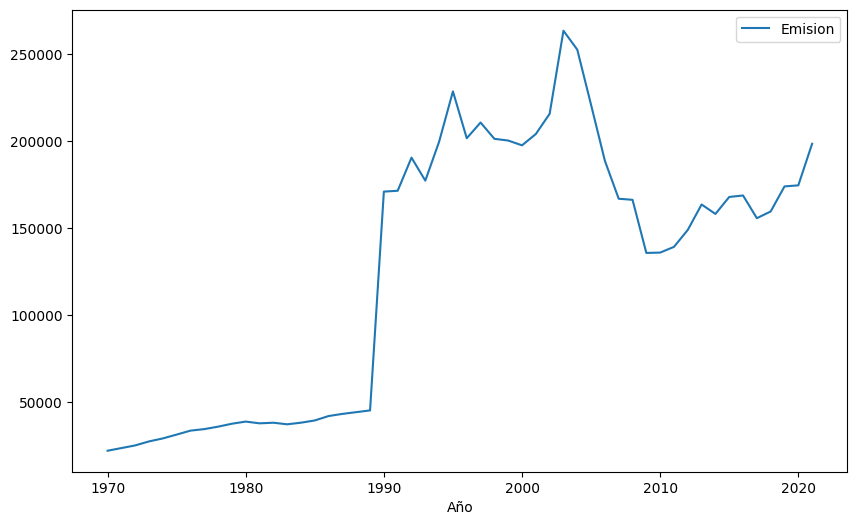

In [486]:
df_emisiones_por_año.groupby('Año').mean(numeric_only=True).plot(figsize=(10,6));

In [487]:
df_emisiones_por_año.groupby('Año').mean(numeric_only=True).idxmax()

Emision    2003
dtype: int64

Generamos la tabla, pero para mostrala en grafico no sirve, por que el ```Año y el Gás``` son indices, solo ```Emision``` es columna

In [488]:
df_emisiones_por_año.groupby(['Año', 'Gás']).mean(numeric_only=True)

Emision
Año  Gás                     
1970 C2F6 (t)        0.232610
     CF4 (t)         3.557421
     CH4 (t)      1471.024024
     CO (t)       2155.556658
     CO2 (t)     19244.913199
...                       ...
2021 HFC-23 (t)      0.000000
     HFC-32 (t)    261.100000
     N2O (t)       119.295311
     NOx (t)       679.395431
     SF6 (t)         5.240000

[1196 rows x 1 columns]

Le aplicamos el metodo ```reset_index()``` para convertirla en tabla de 3 columnas

In [489]:
promedio_emision_anual = df_emisiones_por_año.groupby(['Año', 'Gás']).mean(numeric_only=True).reset_index()
promedio_emision_anual

,Año,Gás,Emision
0,1970,C2F6 (t),0.232610
1,1970,CF4 (t),3.557421
2,1970,CH4 (t),1471.024024
3,1970,CO (t),2155.556658
4,1970,CO2 (t),19244.913199
...,...,...,...
1191,2021,HFC-23 (t),0.000000
1192,2021,HFC-32 (t),261.100000
1193,2021,N2O (t),119.295311
1194,2021,NOx (t),679.395431


### Creando el ```PivotTable``` tabala dinamica para generar el grafico

Así como el método ```melt()``` se utiliza para convertir una tabla del formato wide para long en pandas, también existe un método en esta biblioteca que puede convertir de formato long para wide, llamado ```pivot_table()```.

In [490]:
promedio_emision_anual = promedio_emision_anual.pivot_table(index='Año', columns='Gás', values='Emision')
promedio_emision_anual

Gás,C2F6 (t),CF4 (t),CH4 (t),CO (t),CO2 (t),CO2e (t) GTP-AR2,CO2e (t) GTP-AR4,CO2e (t) GTP-AR5,CO2e (t) GTP-AR6,CO2e (t) GWP-AR2,...,COVNM (t),HFC-125 (t),HFC-134a (t),HFC-143a (t),HFC-152a (t),HFC-23 (t),HFC-32 (t),N2O (t),NOx (t),SF6 (t)
Año,,,,,,,,,,,,,,,,,,,,,
1970,0.232610,3.557421,1471.024024,2155.556658,19244.913199,20821.379814,20821.379814,19162.726020,19775.283385,35396.183865,...,742.074863,0.000000,0.000000,0.000000,0.0,0.00,0.00,31.632709,154.072797,0.000
1971,0.334611,5.117360,1525.506914,2259.625805,21598.587743,22466.288595,22466.288595,20748.481445,21386.175802,37570.982886,...,730.119047,0.000000,0.000000,0.000000,0.0,0.00,0.00,32.609237,170.550178,0.000
1972,0.404684,6.189025,1584.719568,2418.944795,23664.445521,24100.305265,24100.305265,22303.224240,22966.797327,39800.768350,...,774.278817,0.000000,0.000000,0.000000,0.0,0.00,0.00,34.311864,188.856161,0.000
1973,0.463147,7.083136,1642.612439,2596.053853,27726.668829,26683.827206,26683.827206,24827.077028,25516.409611,42947.755490,...,796.866394,0.000000,0.000000,0.000000,0.0,0.00,0.00,35.278689,217.320480,0.000
1974,0.471026,7.203619,1704.614365,2681.450599,30155.918952,28539.318732,28539.318732,26600.481407,27321.124852,45431.240064,...,1024.694923,0.000000,0.000000,0.000000,0.0,0.00,0.00,37.098183,247.521415,0.000
1975,0.502952,7.691893,1854.360821,2730.894830,32292.965771,30593.767465,30593.767465,28507.669059,29285.642221,48944.729581,...,1065.682750,0.000000,0.000000,0.000000,0.0,0.00,0.00,39.451008,262.716346,0.000
1976,0.577172,8.826970,1932.641716,2702.494362,35640.344723,33066.878007,33066.878007,30879.481709,31693.226162,52203.028009,...,1091.778909,0.000000,0.000000,0.000000,0.0,0.00,0.00,41.583225,287.013048,0.000
1977,0.692855,10.596169,1931.897645,2675.992077,37313.909077,34182.312333,34182.312333,31967.243034,32784.131397,53333.605735,...,1147.712448,0.000000,0.000000,0.000000,0.0,0.00,0.00,42.571086,292.405821,0.000
1978,0.749660,11.464915,1921.281930,2755.891877,40669.820049,35969.633601,35969.633601,33762.778999,34580.720998,55015.291182,...,1289.853564,0.000000,0.000000,0.000000,0.0,0.00,0.00,42.426649,322.982906,0.000


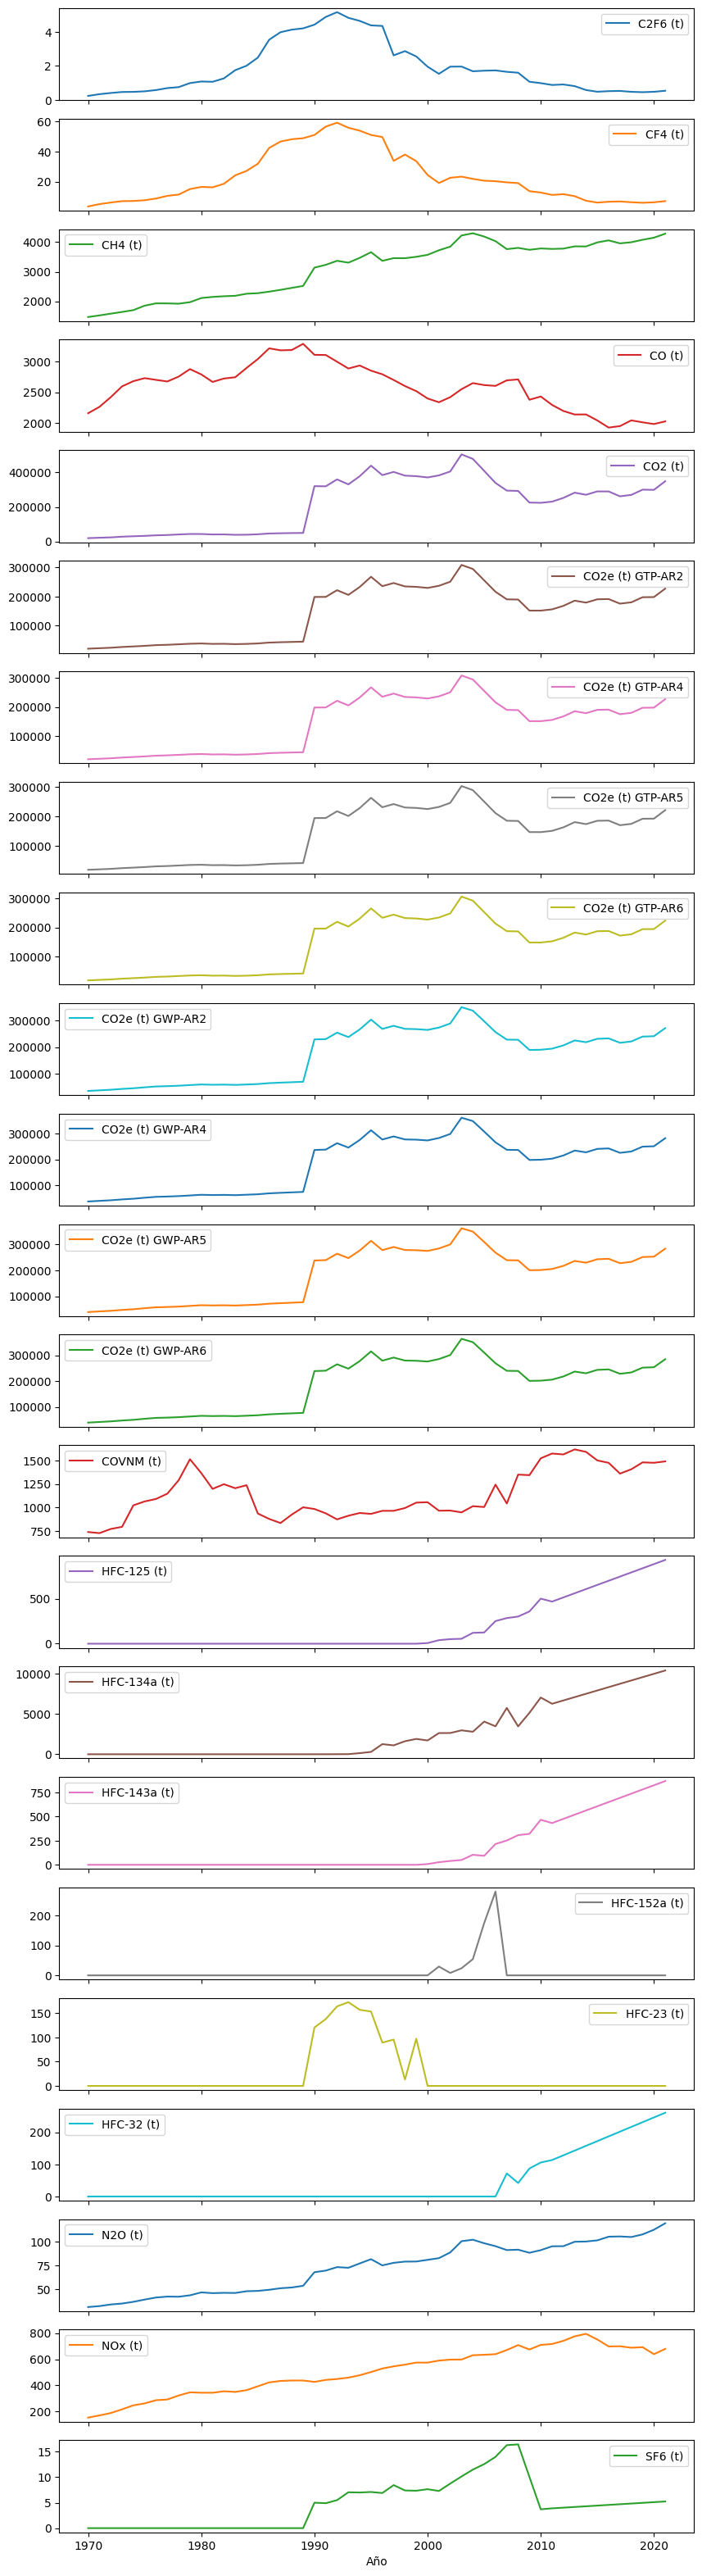

In [491]:
promedio_emision_anual.plot(subplots=True, figsize=(10,40));

# 4. UNIENDO LOS DATOS

In [502]:
import pandas as pd
import numpy as np

Importaremos una nueva base de datos con informacion de la poblacion de cada estado de Brasil, para luego encontrar la emision per cápita de cada estado.

In [503]:
# header=1 que no se encuentra en la posicion 0 si no apartir de la 1
# skipfooter= evitar cargar las filas finales que son 34
df_poblacion = pd.read_excel('POP2022_Municipios.xls', header=1, skipfooter=34)
df_poblacion.head()

,UF,COD. UF,COD. MUNIC,NOME DO MUNICÍPIO,POPULAÇÃO
0,RO,11,15,Alta Floresta D'Oeste,21558
1,RO,11,23,Ariquemes,100896
2,RO,11,31,Cabixi,5107
3,RO,11,49,Cacoal,92202
4,RO,11,56,Cerejeiras,15237


### Agrupamos por UF y mostrar que sume la poblacion

In [504]:
df_poblacion.groupby('UF').sum(numeric_only=True)

,COD. UF,COD. MUNIC
UF,,
AC,264,7719
AL,2754,487914
AM,806,134451
AP,256,5908
BA,12093,7151757
CE,4232,1295156
DF,53,108
ES,2496,226710
GO,12792,2788737


### Convertimos la columna ```POPULAÇÃO``` a numerica

### Antes de convertir a numero, se tiene quitar los (), que evita que se convierta a numero

In [505]:
df_poblacion[df_poblacion['POPULAÇÃO'].str.contains(r'\(.*\)', na=False)]

,UF,COD. UF,COD. MUNIC,NOME DO MUNICÍPIO,POPULAÇÃO
16,RO,11,205,Porto Velho,461.748(1)
74,AM,13,29,Alvarães,15.916(2)
81,AM,13,409,Barcelos,18.399(3)
83,AM,13,607,Benjamin Constant,37.436(4)
87,AM,13,805,Borba,33.209(5)
88,AM,13,839,Caapiranga,13.851(6)
97,AM,13,1605,Fonte Boa,27.692(7)
98,AM,13,1654,Guajará,13.809(8)
99,AM,13,1704,Humaitá,59.504(9)
103,AM,13,1951,Itamarati,10.783(10)


Notamos que la informacion de la poblacion no estaba agregada, por lo que sera necesario realizar algun tratamiento en esta columna para devolver los datos correctamente

In [507]:
# Una sola línea que hace todo
df_poblacion['Poblacion'] = df_poblacion['POPULAÇÃO'].apply(
    lambda x: pd.to_numeric(
        str(x).replace('.', '').split('(')[0].strip() if pd.notna(x) else x,
        errors='coerce'
    )
)
df_poblacion

,UF,COD. UF,COD. MUNIC,NOME DO MUNICÍPIO,POPULAÇÃO,POPULACAO_NUM,Poblacion
0,RO,11,15,Alta Floresta D'Oeste,21558,21558,21558
1,RO,11,23,Ariquemes,100896,100896,100896
2,RO,11,31,Cabixi,5107,5107,5107
3,RO,11,49,Cacoal,92202,92202,92202
4,RO,11,56,Cerejeiras,15237,15237,15237
...,...,...,...,...,...,...,...
5565,GO,52,22005,Vianópolis,14046,14046,14046
5566,GO,52,22054,Vicentinópolis,8776,8776,8776
5567,GO,52,22203,Vila Boa,3686,3686,3686
5568,GO,52,22302,Vila Propício,5646,5646,5646


In [ ]:
#df_poblacion = df_poblacion.assign(Poblacion_nueva = df_poblacion['POPULAÇÃO'].replace(r'\(\d+\)', '', regex=True),
                    #Poblacion = lambda x: x['Poblacion_nueva'].str.replace('.', '', regex=False))
#df_poblacion

,UF,COD. UF,COD. MUNIC,NOME DO MUNICÍPIO,POPULAÇÃO,Poblacion_nueva,Poblacion
0,RO,11,15,Alta Floresta D'Oeste,21558,21558,NaN
1,RO,11,23,Ariquemes,100896,100896,NaN
2,RO,11,31,Cabixi,5107,5107,NaN
3,RO,11,49,Cacoal,92202,92202,NaN
4,RO,11,56,Cerejeiras,15237,15237,NaN
...,...,...,...,...,...,...,...
5565,GO,52,22005,Vianópolis,14046,14046,NaN
5566,GO,52,22054,Vicentinópolis,8776,8776,NaN
5567,GO,52,22203,Vila Boa,3686,3686,NaN
5568,GO,52,22302,Vila Propício,5646,5646,NaN


In [508]:
df_poblacion = df_poblacion.astype({'Poblacion':'int64'})

In [512]:
df_poblacion = df_poblacion.groupby('UF')[['Poblacion']].sum().reset_index()
df_poblacion

,UF,Poblacion
0,AC,829780
1,AL,3125254
2,AM,3952262
3,AP,774268
4,BA,14659023
5,CE,8936431
6,DF,2923369
7,ES,3975100
8,GO,6950976
9,MA,6800605


In [513]:
emisiones_estados = df_emisiones_por_año[df_emisiones_por_año['Año'] == 2021].groupby('Estado')[['Emision']].sum().reset_index()
emisiones_estados

,Estado,Emision
0,AC,3.505471e+08
1,AL,6.261279e+07
2,AM,1.189649e+09
3,AP,3.568410e+07
4,BA,5.932251e+08
5,CE,2.034731e+08
6,DF,5.668738e+07
7,ES,2.697547e+08
8,GO,6.008081e+08
9,MA,9.476324e+08


### Utilizamos el metodo ```merge()``` para unir las columnas: ```emisiones_estados y df_poblacion```

```dataframe1.merge(dataframe2, on=None, how='inner', left_on='nombre_columna_dataframe1', right_on='nombre_columna_dataframe2')```

Donde ```on``` es el nombre de la columna en ambos DataFrames, en caso sea el mismo nombre. El parámetro ```how``` es el tipo de unión a realizar, que puede ser ```'left', 'right', 'inner', 'outer'```. Los parámetros left_on y right_on son respectivamente los nombres de las columnas del DataFrame1 y DataFrame2, en caso tengan nombres diferentes.


In [514]:
datos_agrupados = pd.merge(emisiones_estados, df_poblacion, left_on='Estado', right_on='UF')
datos_agrupados

,Estado,Emision,UF,Poblacion
0,AC,3.505471e+08,AC,829780
1,AL,6.261279e+07,AL,3125254
2,AM,1.189649e+09,AM,3952262
3,AP,3.568410e+07,AP,774268
4,BA,5.932251e+08,BA,14659023
5,CE,2.034731e+08,CE,8936431
6,DF,5.668738e+07,DF,2923369
7,ES,2.697547e+08,ES,3975100
8,GO,6.008081e+08,GO,6950976
9,MA,9.476324e+08,MA,6800605


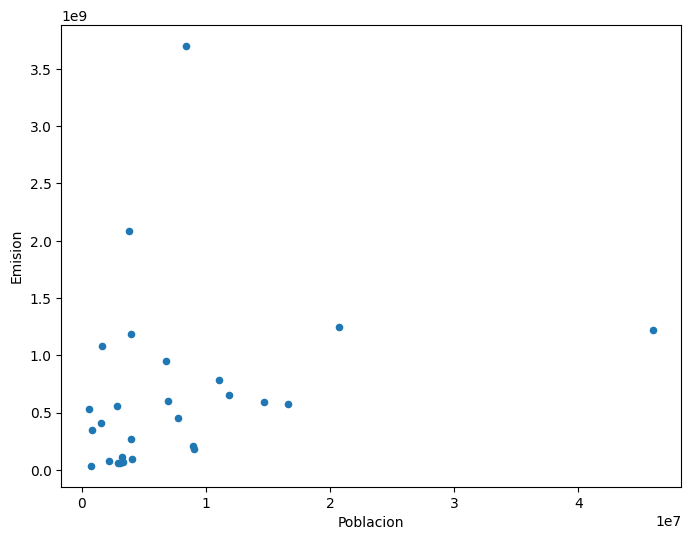

In [515]:
datos_agrupados.plot(x='Poblacion', y='Emision', kind='scatter', figsize=(8,6));